# Lojistik Regresyon

- İkili sonucu olan ikili değişkenleri modellemek için lojistik regresyon kullanılır. İkili vaka modellerinde
  sonuç tipik olarak 0 veya 1'dir
- Amaç, sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi açıklayan
  matematiksel bir model oluşturmaktır.

## Lojistik Regresyon - Diabet Tahmin Modeli
Bir hasta geldiğinde bu hastanın şeker hastası olup olmadığını tahmin edilebilecek bir makine öğrenmesi modeli geliştirmek.
- Kişilerin çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışaca
    

Veri Setinin İlk 5 Satırı:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-n

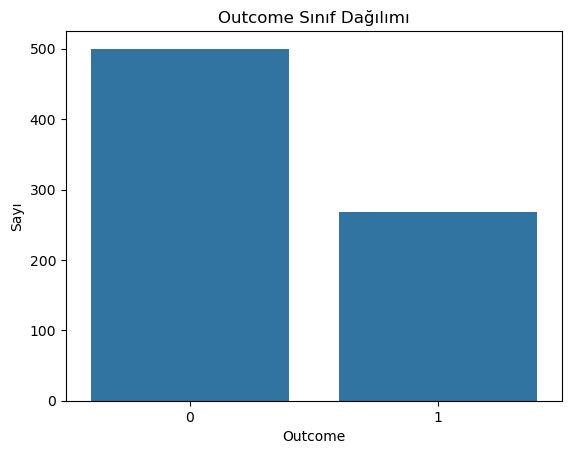

In [105]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri setini yükleme
data_path = 'diabetes.csv'  # Dosya yolunu belirtiyoruz
df = pd.read_csv(data_path)

# 2. Veri setinin ilk 5 satırını görüntüleme
print("Veri Setinin İlk 5 Satırı:")
print(df.head())

# 3. Veri seti hakkında genel bilgi
print("\nVeri Seti Bilgileri:")
print(df.info())

# 4. Eksik veri kontrolü
print("\nEksik Veri Kontrolü:")
print(df.isnull().sum())

# 5. Hedef değişkenin sınıf dağılımı
print("\nOutcome Sınıf Dağılımı:")
print(df['Outcome'].value_counts())

# Bar grafikte sınıf dağılımını görselleştirme
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Sınıf Dağılımı')
plt.xlabel('Outcome')
plt.ylabel('Sayı')
plt.show()



Bir hasta geldiğinde bu hastanın şeker hastası olup olmadığını tahmin edilebilecek bir makine öğrenmesi modeli geliştirmek.
- Kişilerin çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışaca
    - Bu durumlar gözlemlendiğinde Outcome bağımlı değişkeni 1 ise şeker hastası 0 ise şeker hastası olmadığını tahmin edebilmek
- Outcome kategorik bir değişkendir

# Model Oluşturma

In [3]:
# Bağımlı ve bağımsız değişkenlerin belirlenmesi
X = df.drop('Outcome', axis=1)  # Bağımsız değişkenler
y = df['Outcome']  # Bağımlı değişken

print("Bağımsız Değişkenlerin İlk 5 Satırı:")
print(X.head())
print("\nBağımlı Değişkenin İlk 5 Değeri:")
print(y.head())


Bağımsız Değişkenlerin İlk 5 Satırı:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Bağımlı Değişkenin İlk 5 Değeri:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [5]:
df.info() #veri seti hakkında bilgi verildi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df["Outcome"].value_counts() #Outcome değişkeninin sınıflarının sayıları	

Outcome
0    500
1    268
Name: count, dtype: int64

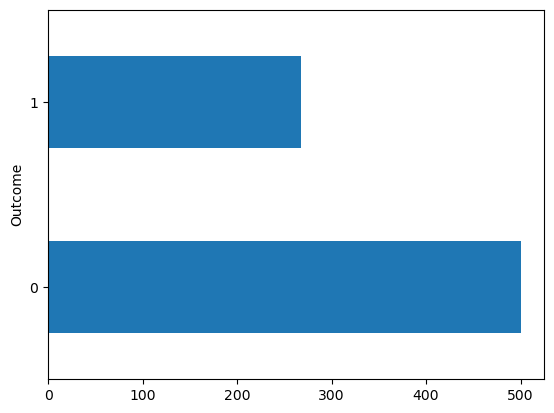

In [9]:
df["Outcome"].value_counts().plot.barh(); #Outcome değişkeninin sınıf dağılımı gösterildi

In [11]:
df.describe().T #veri seti hakkında istatistiksel bilgiler verildi

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
y = df["Outcome"] #bağımlı değişken
X = df.drop(["Outcome"], axis = 1) #bağımsız değişkenler


# Stats Model Oluşturma

import statsmodels.api as sm

# Statsmodels lojistik regresyon modeli
X = sm.add_constant(X)  # Sabit terimi ekliyoruz (intercept)
loj_model = sm.Logit(y, X)  # Lojistik regresyon modeli
loj_result = loj_model.fit()  # Modeli eğitiyoruz

# Model özetini görüntüleme
print(loj_result.summary())


# Scikit - Learn Regresyon Modeli Oluşturma

In [21]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon Modeli Oluşturma
loj_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Model tanımlama
loj_model.fit(X, y)  # Modeli eğitme

# Modelin sabiti ve katsayıları
print("Modelin Sabiti (Intercept):", loj_model.intercept_)
print("Modelin Katsayıları (Coefficients):", loj_model.coef_)


Modelin Sabiti (Intercept): [-3.40947333]
Modelin Katsayıları (Coefficients): [[-3.40947333e+00  1.18745223e-01  3.09201552e-02 -1.54789595e-02
   7.91653224e-04 -8.46239843e-04  7.07749977e-02  7.48081654e-01
   1.02330158e-02]]


# Tahmin Model Ayarlama

In [31]:
y_pred = loj_model.predict(X) #model tahminleri

In [33]:
confusion_matrix(y, y_pred) #modelin karışıklık matrisi

array([[446,  54],
       [118, 150]], dtype=int64)

In [35]:
accuracy_score(y, y_pred) #modelin doğruluk oranı

0.7760416666666666

- Recall: Pozitif sınıfın (1) doğru tahmin edilme oranıdır. Tahmin edilen pozitif sınıfların ne kadarının doğru tahmin edildiğini gösterir. 2. tip hata ile
  ilgilenir. Gözden kaçırmaların maliyeti hakkında bilgi verdiğinden önemli bir ölçüdür. Gerçekleri yakalama başarısına odaklanır. Hesaplamak için
  TP/(TP+FN) formülü kullanılır.
- F1 Score: Precision ve recall değerlerinin harmonik ortalamasıdır. Hem Precision hem de Recall değerinin etkisini tutmaktadır. Hesaplamak için
  2*(Precision*Recall)/(Precision+Recall) formülü kullanılır

In [37]:
print(classification_report(y, y_pred)) #modelin sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [39]:
loj_model.predict(X)[0:5] #modelin ilk 5 tahmini

array([1, 0, 1, 0, 1], dtype=int64)

- İlk 5 değer makine tahmini

In [41]:
loj_model.predict_proba(X)[0:5] #modelin ilk 5 tahmininin olasılık değerleri , ilgilenen olasıklar 2. sütun

array([[0.32263943, 0.67736057],
       [0.93138915, 0.06861085],
       [0.21789513, 0.78210487],
       [0.93718325, 0.06281675],
       [0.14390863, 0.85609137]])

- ilk 5 değer gerçek değerler

In [43]:
y[0:5] #gerçek değerler

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [45]:
y_probs = loj_model.predict_proba(X) #modelin tahminlerinin olasılık değerleri
y_probs = y_probs[:,1] #ilgilenen olasıklar 2. sütun

- ilk 5 değer olasılık değerleri (düzenlenmiş)

In [47]:
y_probs[0:5] #modelin ilk 5 tahmininin olasılık değerleri

array([0.67736057, 0.06861085, 0.78210487, 0.06281675, 0.85609137])

In [49]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] #modelin tahminleri

- ilk 5 değerin tahminleri (düzenlenmiş model)

In [51]:
y_pred[0:5] #modelin ilk 5 tahmini , önceki değerler ile karşılaştır

[1, 0, 1, 0, 1]

In [53]:
confusion_matrix(y, y_pred) #modelin karışıklık matrisi


array([[446,  54],
       [118, 150]], dtype=int64)

- Modelin doğruluk skoru 

In [55]:
accuracy_score(y, y_pred) #modelin doğruluk oranı

0.7760416666666666

In [57]:
print(classification_report(y, y_pred)) #modelin sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [59]:
loj_model.predict_proba(X)[:,1][0:5] #modelin ilk 5 tahmininin olasılık değerleri  

array([0.67736057, 0.06861085, 0.78210487, 0.06281675, 0.85609137])

# Lojistik Regresyon - Roc Curve Metriği

![roc_curve.jpg](roc_curve.jpg)

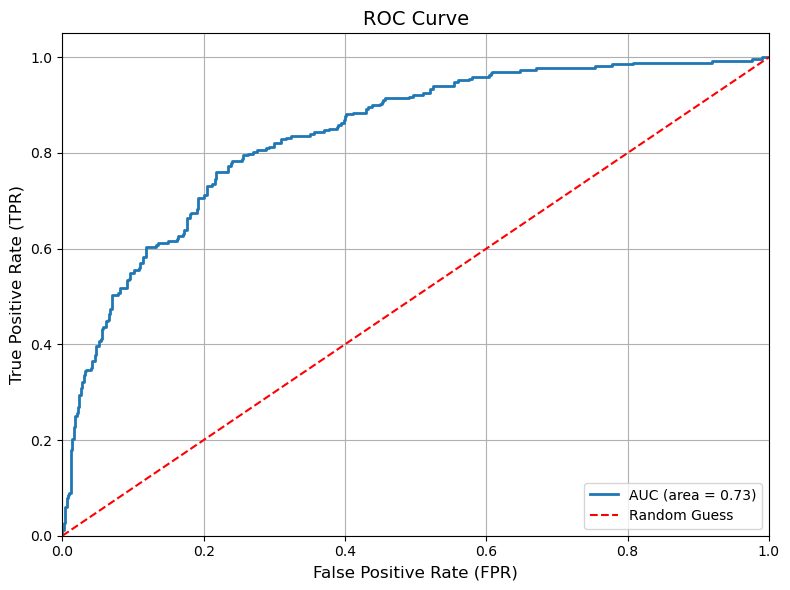

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC skoru hesaplama
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

# ROC eğrisi için False Positive Rate (FPR) ve True Positive Rate (TPR) hesaplama
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:, 1])

# ROC eğrisi görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC (area = {logit_roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')  # Rastgele tahmin eğrisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 42) #veri seti train ve test olarak bölündü


In [67]:
loj = LogisticRegression(solver = "liblinear") #lojistik regresyon modeli oluşturuldu
loj_model = loj.fit(X_train,y_train) #model eğitildi
loj_model #model özet bilgileri verildi

LogisticRegression(solver='liblinear')

#### Modelin doğruluk oranı train ve test data

In [101]:
# Doğruluk oranını hesaplama
test_accuracy = accuracy_score(y_test, loj_model.predict(X_test))

# Doğruluk oranını yazdırma
print(f"Test Veri Seti Doğruluk Oranı: {test_accuracy:.2f}")


Test Veri Seti Doğruluk Oranı: 0.75


In [77]:
from sklearn.model_selection import cross_val_score

# Eğitim verisi üzerinde 5 katlı çapraz doğrulama
cross_val_scores = cross_val_score(loj_model, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()

print(f"5 Katlı Çapraz Doğrulama Ortalama Doğruluk: {mean_accuracy:.2f}")


5 Katlı Çapraz Doğrulama Ortalama Doğruluk: 0.78
